# Imports

In [93]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import string
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import imdb, fashion_mnist, mnist
from tensorflow.keras import layers, saving

# Number Image Recognition

In [68]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [69]:
model = keras.Sequential([layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9241 - loss: 0.2642
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9689 - loss: 0.1059 
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9797 - loss: 0.0697
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9853 - loss: 0.0495
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9886 - loss: 0.0377


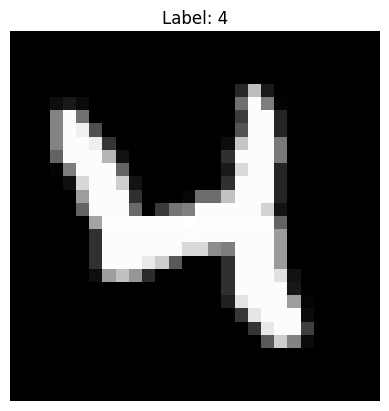

In [74]:
# model.save("digit_classifier.keras")
# loaded_model = keras.saving.load_model("digit_classifier.keras")
plt.imshow(train_images[20].reshape(28, 28), cmap="gray")
plt.title(f"Label: {train_labels[20]}")
plt.axis("off")
plt.show()

In [18]:
from PIL import Image, ImageOps
import numpy as np

def prediction(name):    
    img = Image.open(f"../../../Extra/Numbers/{name}.jpeg").convert("L")
    img = ImageOps.invert(img).resize((28, 28))
    img_array = np.array(img) / 255.0
    img_flat = img_array.reshape(1, 784)
    return model.predict(img_flat, verbose=0)

for i in range(10):
    for j in range(5):
        print(f"'{i}' as '{np.argmax(prediction(f"{i} ({j+1})"))}'")

'0' as '0'
'0' as '0'
'0' as '9'
'0' as '9'
'0' as '0'
'1' as '1'
'1' as '1'
'1' as '1'
'1' as '1'
'1' as '1'
'2' as '2'
'2' as '2'
'2' as '2'
'2' as '2'
'2' as '2'
'3' as '3'
'3' as '3'
'3' as '3'
'3' as '3'
'3' as '3'
'4' as '4'
'4' as '4'
'4' as '5'
'4' as '4'
'4' as '4'
'5' as '8'
'5' as '5'
'5' as '8'
'5' as '5'
'5' as '8'
'6' as '4'
'6' as '4'
'6' as '9'
'6' as '5'
'6' as '4'
'7' as '7'
'7' as '7'
'7' as '1'
'7' as '2'
'7' as '7'
'8' as '8'
'8' as '8'
'8' as '8'
'8' as '1'
'8' as '4'
'9' as '9'
'9' as '9'
'9' as '3'
'9' as '9'
'9' as '8'


# Fashion MNIST

In [19]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [20]:
model = keras.Sequential([layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8008 - loss: 0.5590
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8596 - loss: 0.3844
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8755 - loss: 0.3390
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8845 - loss: 0.3129
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8903 - loss: 0.2935


In [32]:
def decode_fashion_label(label):
    labels = { 0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
    return labels.get(label, "Unknown")

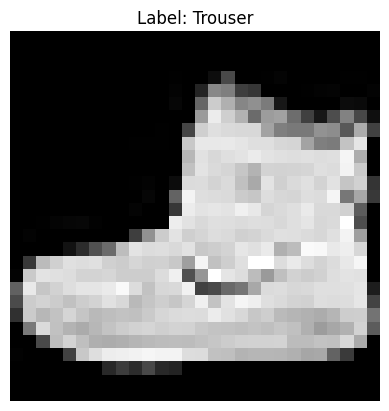

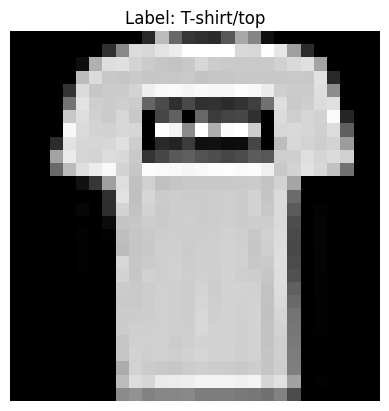

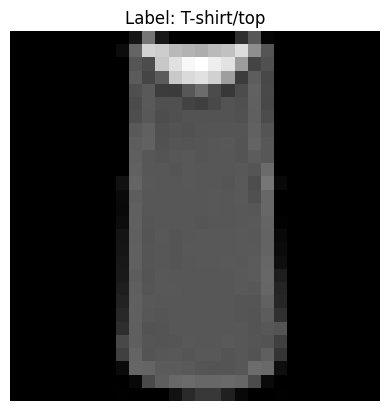

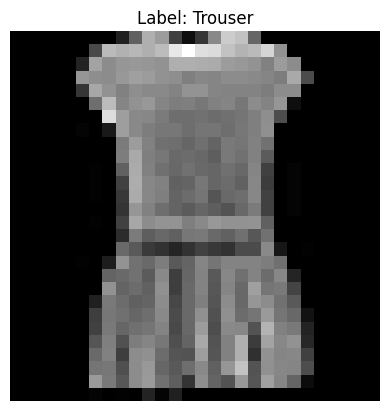

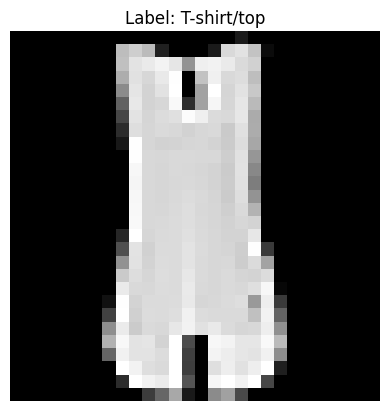

In [65]:
for i in range(5):
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {decode_fashion_label(train_labels[i])}")
    plt.axis("off")
    plt.show()

# Text Recognition

In [49]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [51]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [52]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [53]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [54]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [56]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")])

In [59]:
# model.summary()

In [60]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [61]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [62]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 258ms/step - accuracy: 0.7269 - loss: 0.5752 - val_accuracy: 0.8658 - val_loss: 0.4506
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8864 - loss: 0.3674 - val_accuracy: 0.8818 - val_loss: 0.3423
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9173 - loss: 0.2654 - val_accuracy: 0.8859 - val_loss: 0.2977
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9322 - loss: 0.2107 - val_accuracy: 0.8880 - val_loss: 0.2811
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9457 - loss: 0.1741 - val_accuracy: 0.8675 - val_loss: 0.3251
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9576 - loss: 0.1464 - val_accuracy: 0.8859 - val_loss: 0.2844
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9628 - loss: 0.1257 - val_accuracy: 0.8838 - val_loss: 0.3077
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9671 - loss: 0.1121 - val_accuracy: 0.8840 -

# Review Work

In [66]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [75]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [94]:
def standardize(text):
    text = text.lower()
    text = "".join(char for char in text if char not in string.punctuation)
    return text

def tokenize(text):
    standardized = standardize(text)
    return standardized.split()

In [95]:
dataset = ["? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"]

vocab = {}
for text in dataset:
    text = standardize(text)
    tokens = tokenize(text)
    for token in tokens:
        if token not in vocab:
            vocab[token] = len(vocab)
vocab

{'this': 0,
 'film': 1,
 'was': 2,
 'just': 3,
 'brilliant': 4,
 'casting': 5,
 'location': 6,
 'scenery': 7,
 'story': 8,
 'direction': 9,
 'everyones': 10,
 'really': 11,
 'suited': 12,
 'the': 13,
 'part': 14,
 'they': 15,
 'played': 16,
 'and': 17,
 'you': 18,
 'could': 19,
 'imagine': 20,
 'being': 21,
 'there': 22,
 'robert': 23,
 'is': 24,
 'an': 25,
 'amazing': 26,
 'actor': 27,
 'now': 28,
 'same': 29,
 'director': 30,
 'father': 31,
 'came': 32,
 'from': 33,
 'scottish': 34,
 'island': 35,
 'as': 36,
 'myself': 37,
 'so': 38,
 'i': 39,
 'loved': 40,
 'fact': 41,
 'a': 42,
 'real': 43,
 'connection': 44,
 'with': 45,
 'witty': 46,
 'remarks': 47,
 'throughout': 48,
 'were': 49,
 'great': 50,
 'it': 51,
 'much': 52,
 'that': 53,
 'bought': 54,
 'soon': 55,
 'released': 56,
 'for': 57,
 'would': 58,
 'recommend': 59,
 'to': 60,
 'everyone': 61,
 'watch': 62,
 'fly': 63,
 'fishing': 64,
 'cried': 65,
 'at': 66,
 'end': 67,
 'sad': 68,
 'know': 69,
 'what': 70,
 'say': 71,
 'if': 

In [101]:
def one_hot_encode_token(token):
    vector = np.zeros((len(vocab),))
    token_index = vocab[token]
    vector[token_index] = 1
    return vector

In [108]:
for t in tokens:
    print(f"'{t}': {one_hot_encode_token(t)} \n")

'this': [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

'film': [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

'was': [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 